## Import Libraries

In [29]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from ydata_profiling import ProfileReport
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# Random forest and XGBoost with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")


## Data Exploration

In [30]:
data = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [31]:
profile = ProfileReport(data, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 22/22 [00:00<00:00, 637.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_binary         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

## Preprocessing

In [33]:
data = data.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [34]:
# Check null values
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [35]:
# Check unique values
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Diabetes_binary                        2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [36]:
for i in data :
  print(data[i].value_counts())
  print("------------------")

Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
------------------
HighBP
0    144851
1    108829
Name: count, dtype: int64
------------------
HighChol
0    146089
1    107591
Name: count, dtype: int64
------------------
CholCheck
1    244210
0      9470
Name: count, dtype: int64
------------------
BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
86        1
91        1
90        1
78        1
Name: count, Length: 84, dtype: int64
------------------
Smoker
0    141257
1    112423
Name: count, dtype: int64
------------------
Stroke
0    243388
1     10292
Name: count, dtype: int64
------------------
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
------------------
PhysActivity
1    191920
0     61760
Name: count, dtype: int64
------------------
Fruits
1    160898
0     92782
Name: count, dtype: int64
------------------
Veggies
1    205841
0     47839
Name: count, dtype: int64
------------------
HvyAlcoholCo

In [37]:
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()
data.shape

(229474, 22)

In [38]:
data["Diabetes_binary_str"]= data["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"})

In [39]:
data.drop(columns=['Diabetes_binary_str'], inplace=True)

## EDA

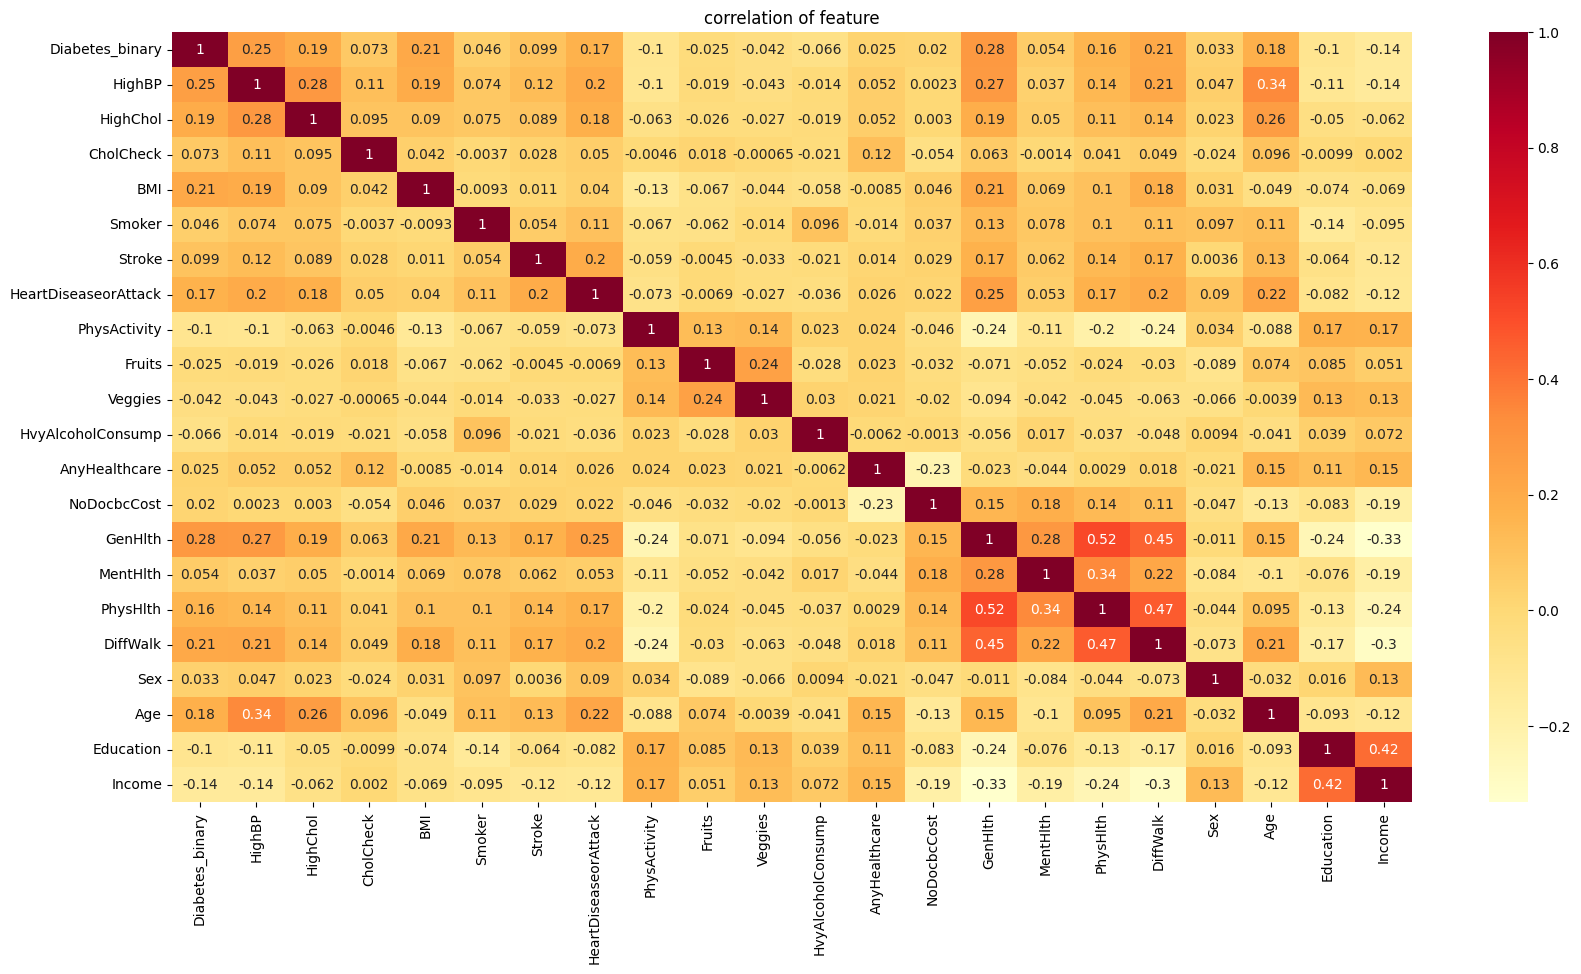

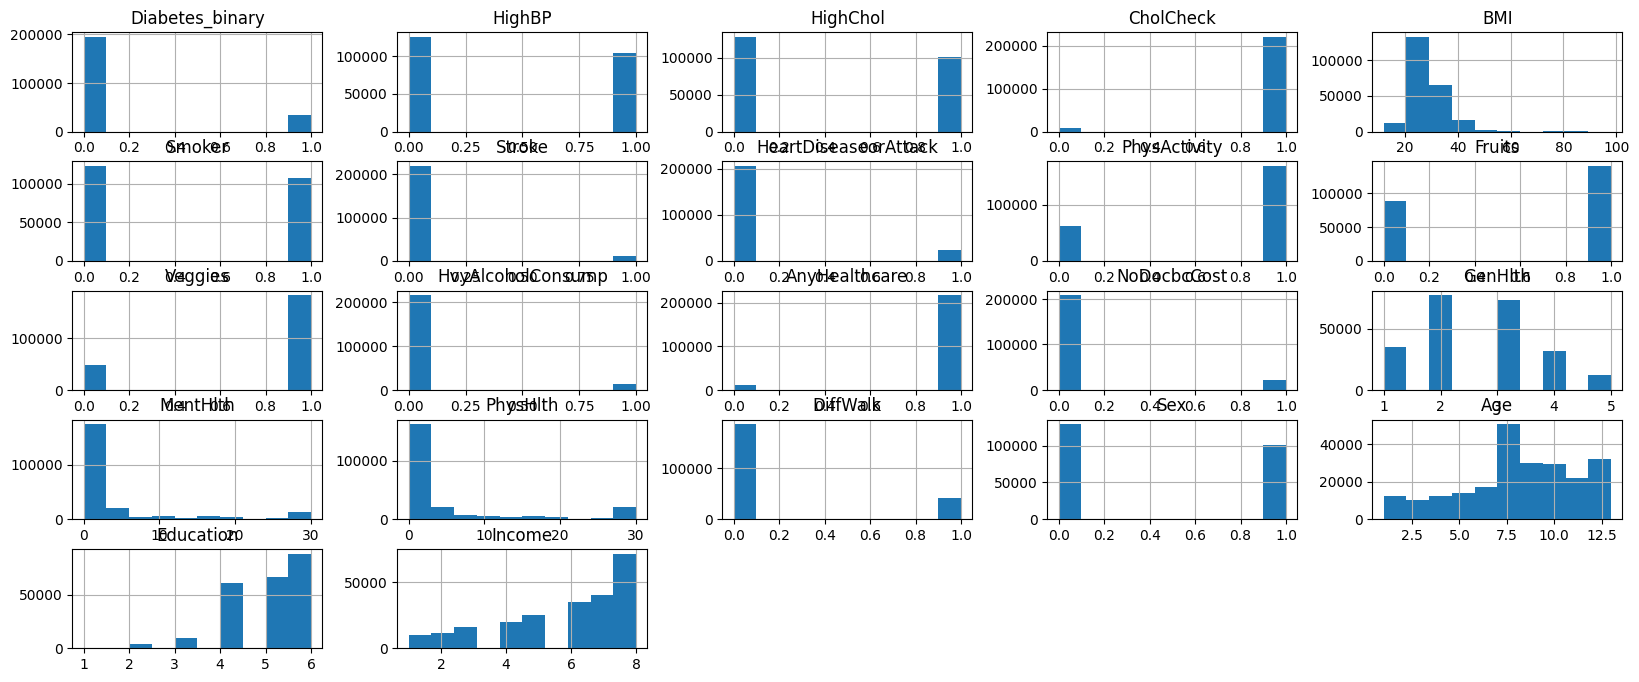

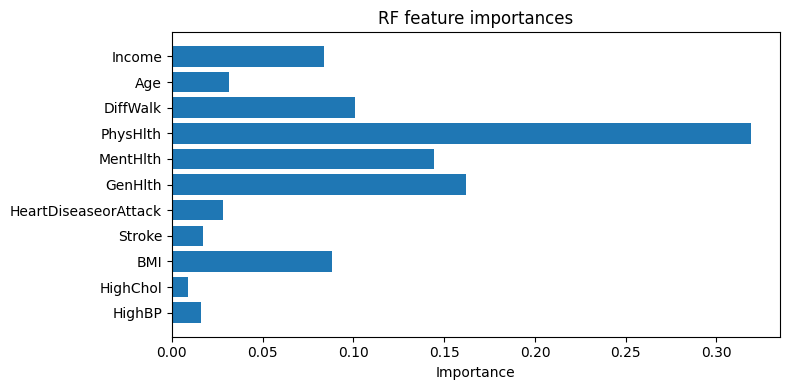

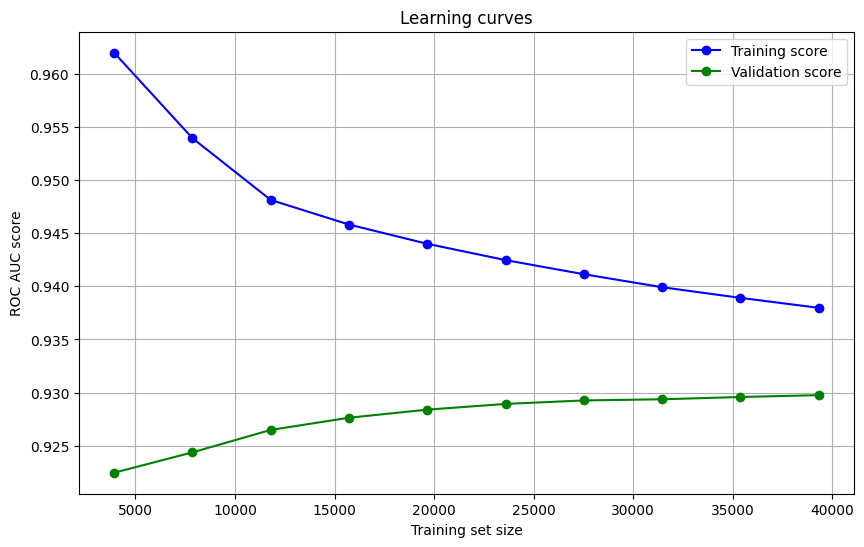

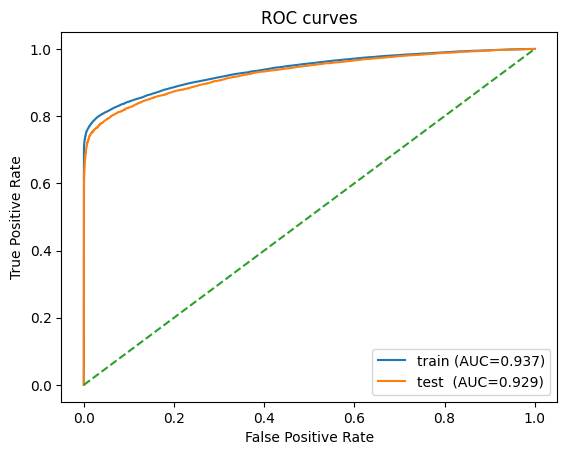

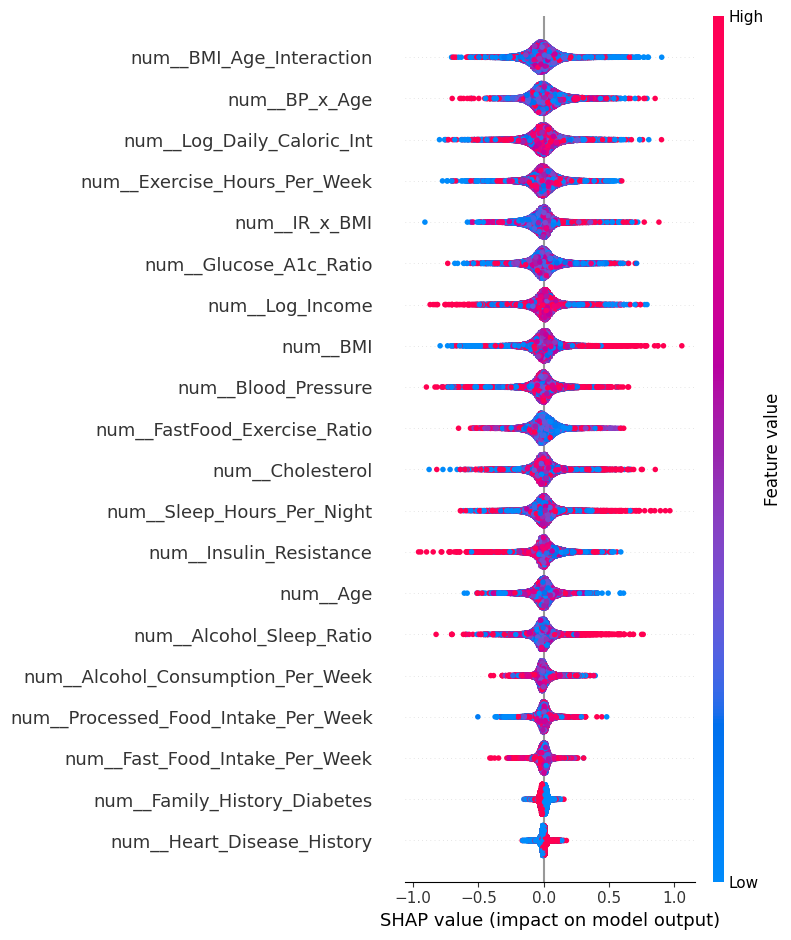

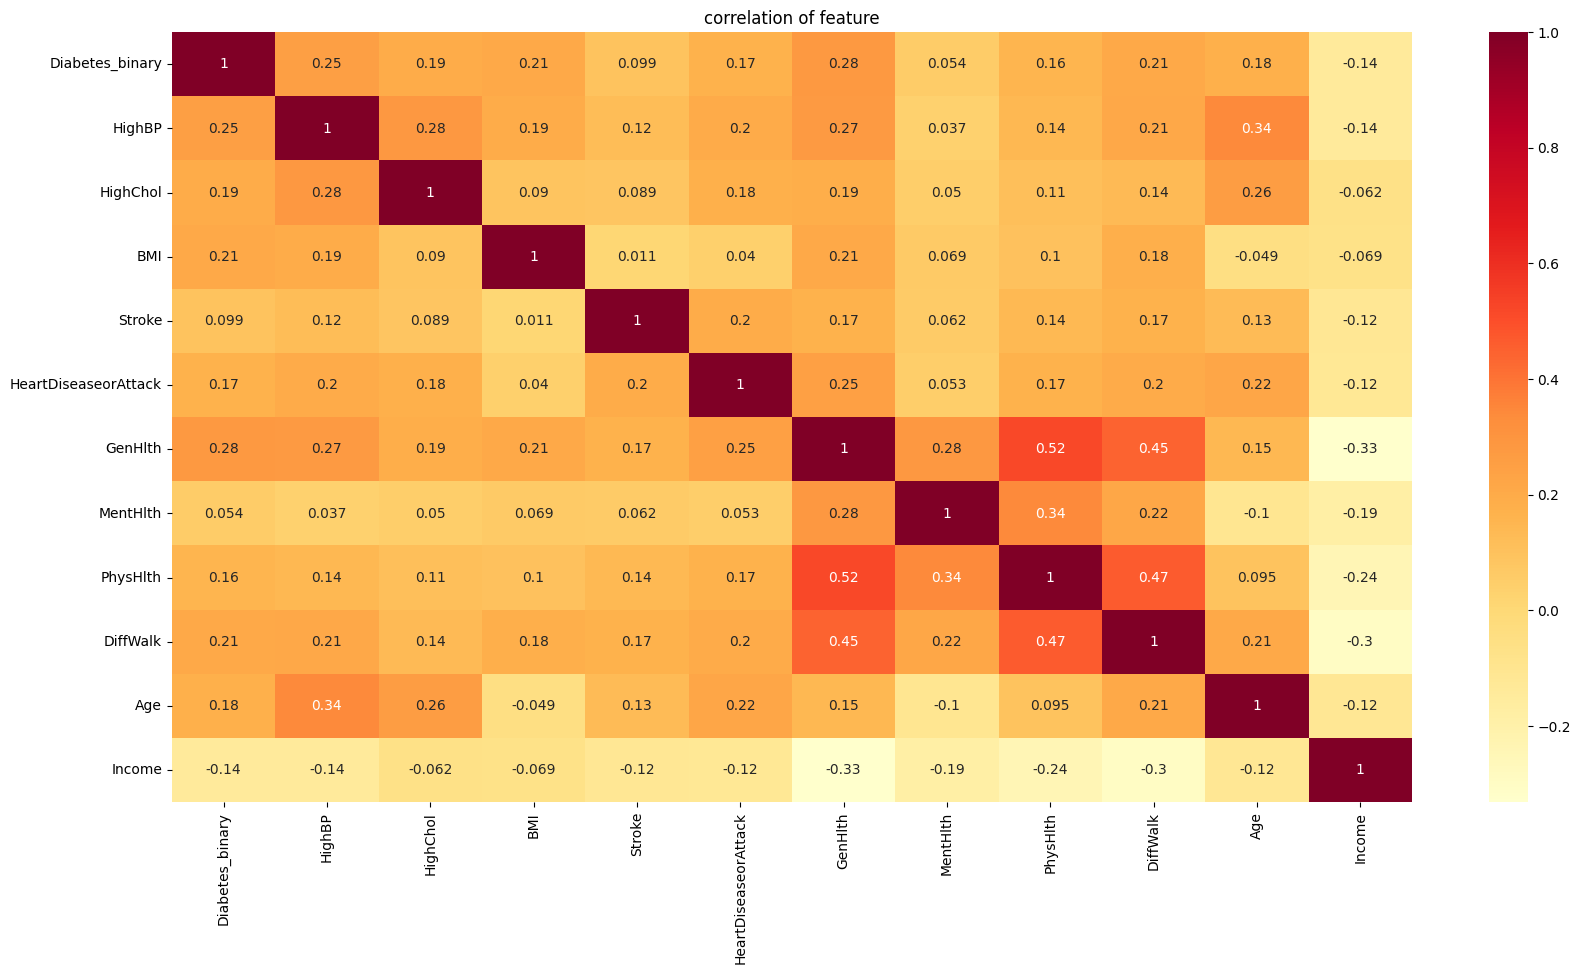

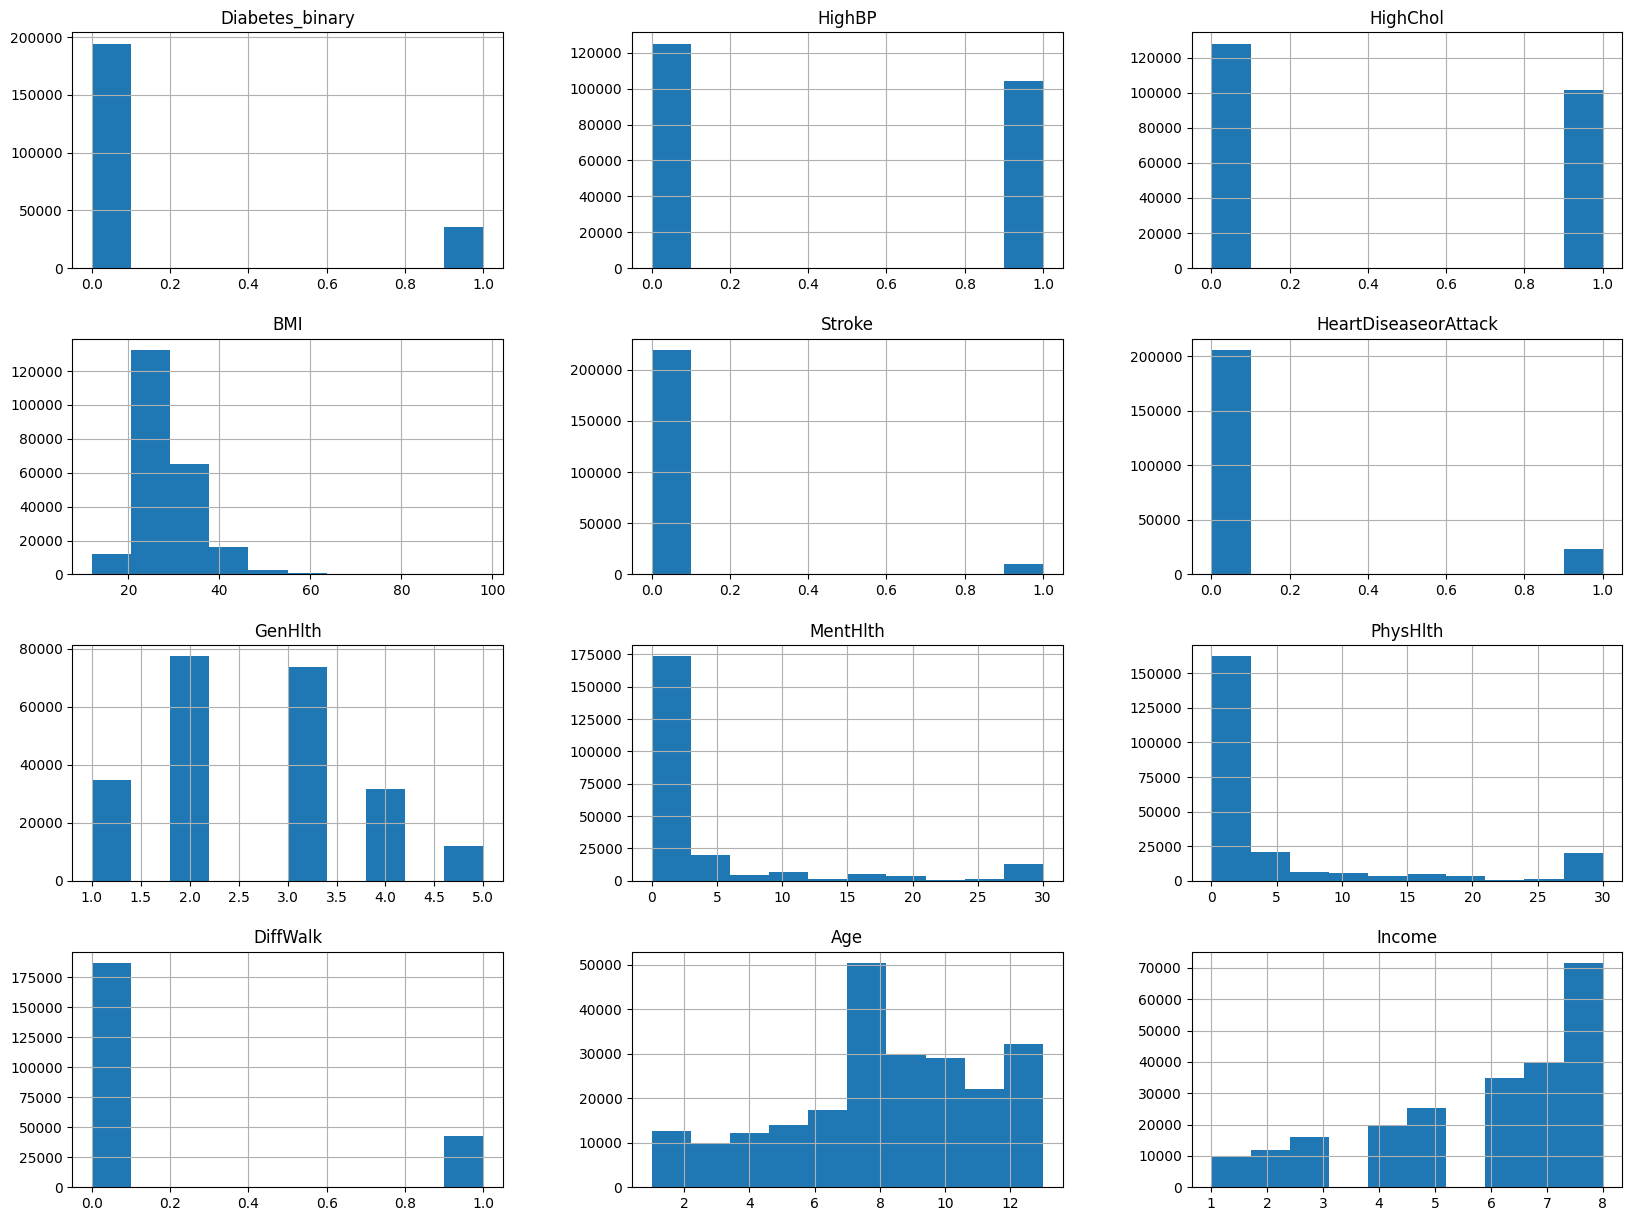

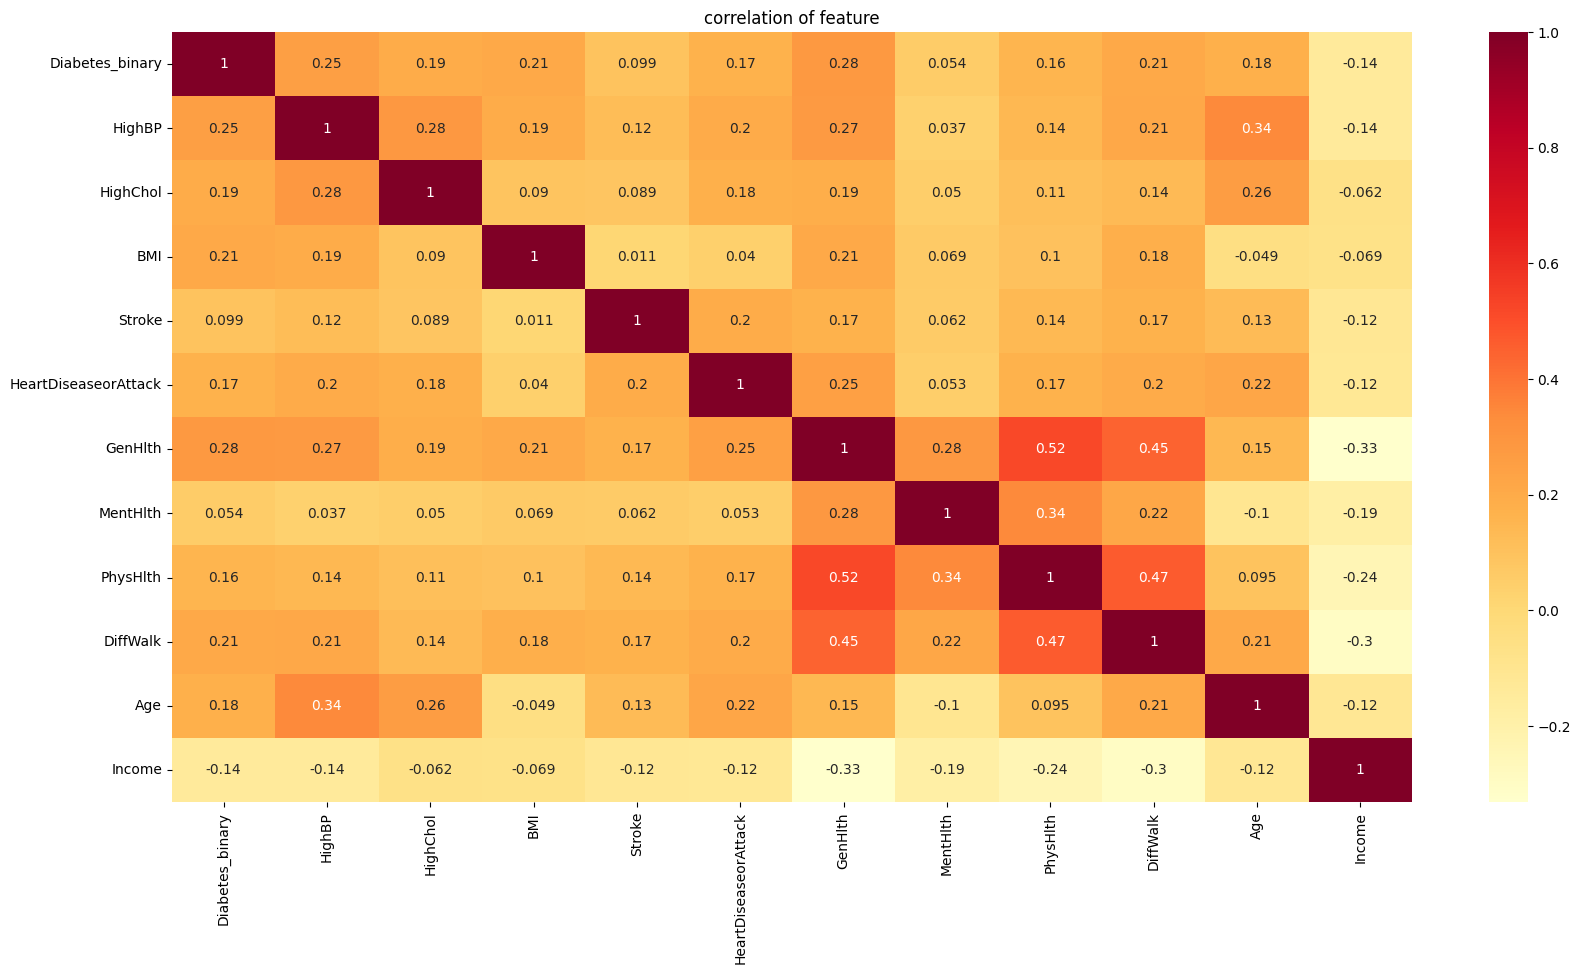

In [66]:
#using heatmap to understand correlation better in dataset data 
#Heatmap of correlation
%matplotlib inline

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()

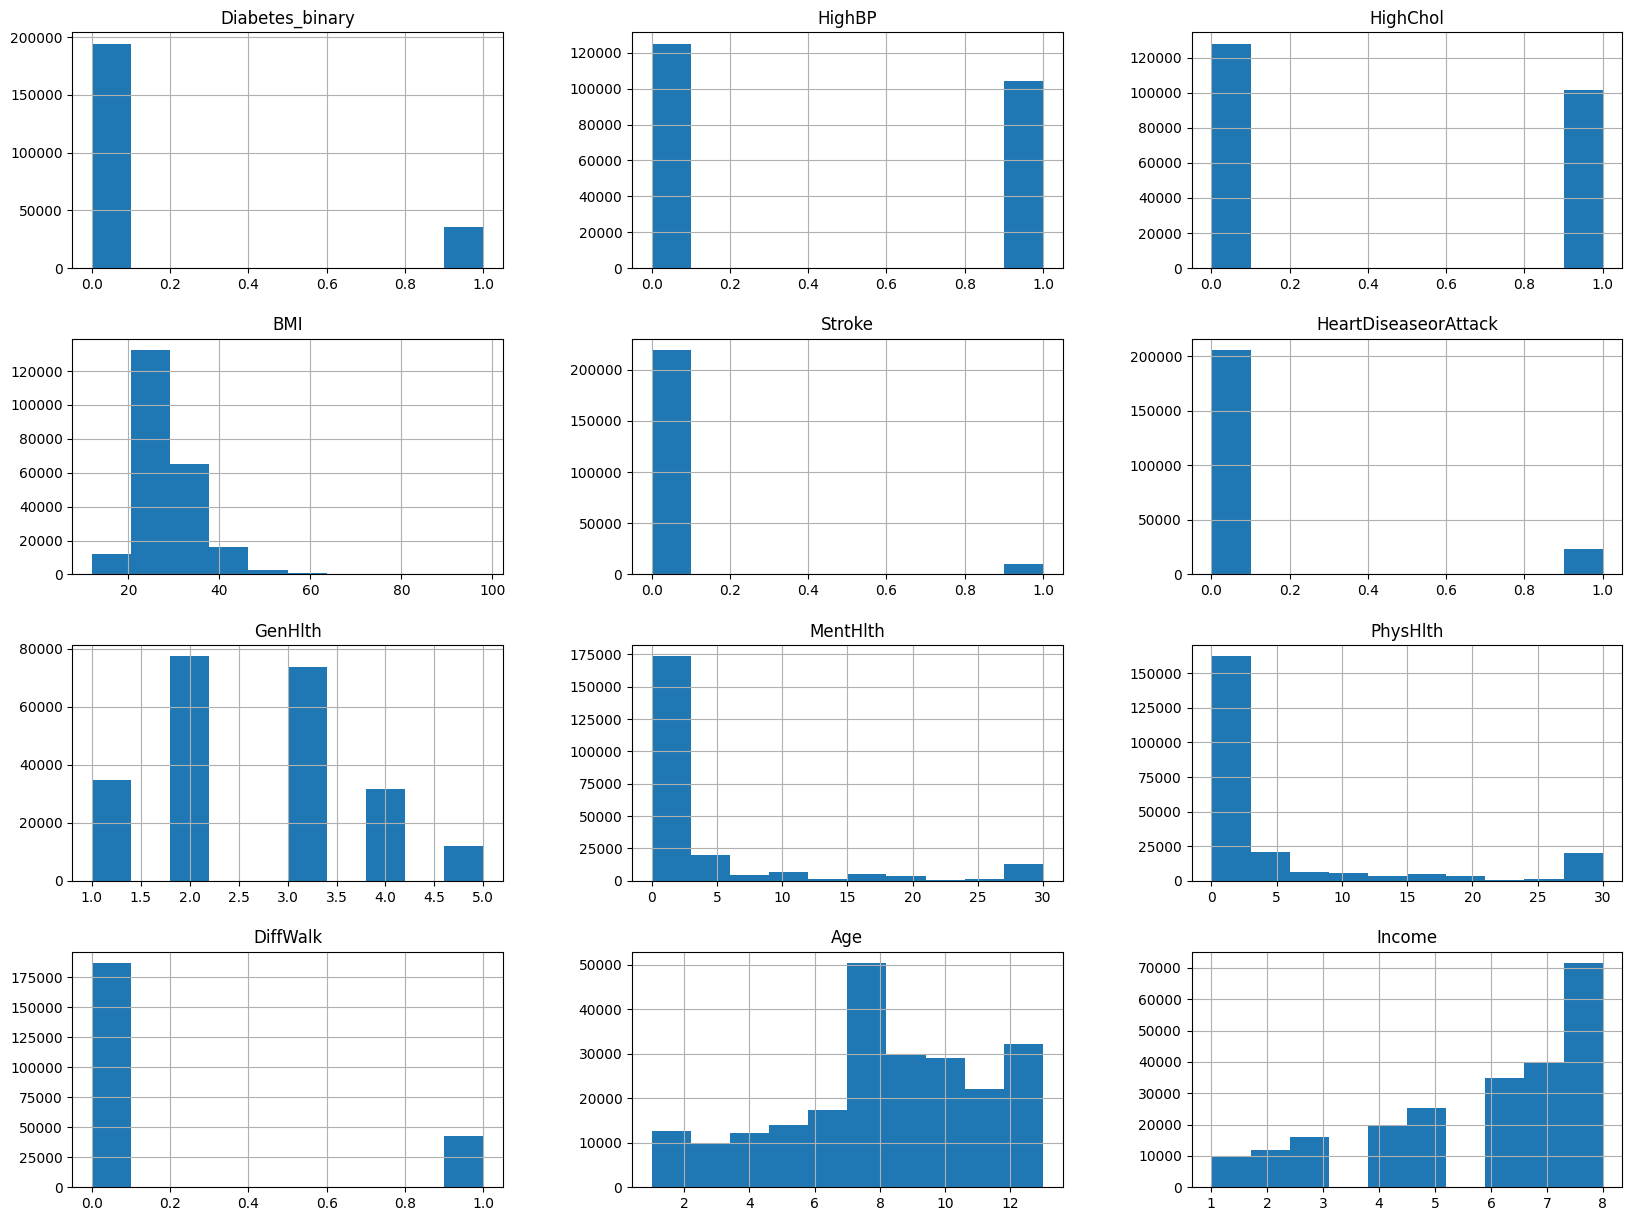

In [67]:
data.hist(figsize=(20,15))
plt.show()

In [42]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="Purple")

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

In [44]:
# Anova
X = data.iloc[:, data.columns != 'Diabetes_binary']
Y = data.iloc[:, data.columns == 'Diabetes_binary']

# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, Y)
print(X_selected.shape)

(229474, 10)


In [19]:
#apply SelectKBest class to extract top 10 best features
BestFeatures = SelectKBest(score_func=chi2, k=20)
fit = BestFeatures.fit(X,Y)

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Feature','Score']

print(f_Scores.nlargest(21,'Score')) #print 16 best features

                 Feature         Score
15              PhysHlth  97988.761672
3                    BMI  15507.736174
14              MentHlth  11419.584750
18                   Age   8539.906340
0                 HighBP   8098.548237
16              DiffWalk   7875.496177
13               GenHlth   7671.732832
6   HeartDiseaseorAttack   5822.145697
1               HighChol   4869.312739
20                Income   3377.099257
5                 Stroke   2156.678382
10     HvyAlcoholConsump    937.401148
7           PhysActivity    617.563886
19             Education    479.112939
4                 Smoker    253.826098
17                   Sex    137.837135
12           NoDocbcCost     83.662830
9                Veggies     82.098846
8                 Fruits     54.688897
2              CholCheck     48.904140
11         AnyHealthcare      7.949731


In [45]:
# drop the features with low scores
columns_to_drop = f_Scores.nsmallest(10,'Score')['Feature'].values
print(columns_to_drop)

data.drop(columns=columns_to_drop, inplace=True)

['AnyHealthcare' 'CholCheck' 'Fruits' 'Veggies' 'NoDocbcCost' 'Sex'
 'Smoker' 'Education' 'PhysActivity' 'HvyAlcoholConsump']


In [46]:
X = data.iloc[:, data.columns != 'Diabetes_binary']
Y = data.iloc[:, data.columns == 'Diabetes_binary']

In [47]:
Y.value_counts()

Diabetes_binary
0                  194377
1                   35097
Name: count, dtype: int64

In [48]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1, n_neighbors=10)
x_sm, y_sm = nm.fit_resample(X, Y)

y_sm.shape, x_sm.shape
y_sm.value_counts()

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [50]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , y_train)

# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, y_test)))

Training set score: 0.8457
Test set score: 0.8423


In [51]:

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Create an XGBoost classifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
# Perform Grid Search with Cross-Validation
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1)
# Fit the model
grid_search_xgb.fit(X_train, y_train)
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best parameters for XGBoost:", best_params_xgb)
# Create an XGBoost classifier with the best parameters
xgb_best = XGBClassifier(**best_params_xgb, random_state=42, eval_metric='logloss')
# Fit the model
xgb_best.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_best.predict(X_test)
# Evaluate accuracy on training and test sets
print('Training set score: {:.4f}'.format(xgb_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(xgb_best.score(X_test, y_test)))

Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Training set score: 0.8808
Test set score: 0.8184


In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
# Perform Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=0)
# Fit the model
grid_search_rf.fit(X_train, y_train.values.ravel())
# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)
# Create a Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
# Fit the model
rf_best.fit(X_train, y_train)
# Make predictions
y_pred_rf = rf_best.predict(X_test)
# Evaluate accuracy on training and test sets
print('Training set score: {:.4f}'.format(rf_best.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rf_best.score(X_test, y_test)))



Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Training set score: 0.8702
Test set score: 0.8648


In [28]:
# 1) Imports
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# 2) Build an imbalanced-aware pipeline
pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),                # oversample minority class
    ("clf", RandomForestClassifier(
        random_state=42,
        class_weight="balanced_subsample"             # also weight trees by class freq
    ))
])

# 4) Tune XGBoost – note wider trees & lower learning rate
xgb_pipe = Pipeline([
    ("smote", SMOTE(random_state=42)),
    ("clf", XGBClassifier(
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_dist = {
    "clf__n_estimators": randint(100, 1000),
    "clf__max_depth": randint(3, 15),
    "clf__learning_rate": uniform(0.01, 0.3),
    "clf__subsample": uniform(0.6, 0.4),
    "clf__colsample_bytree": uniform(0.6, 0.4),
    "clf__gamma": uniform(0, 5)
}

rs_xgb = RandomizedSearchCV(
    xgb_pipe, xgb_dist,
    n_iter=50,
    cv=StratifiedKFold(5),
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
)
rs_xgb.fit(X_train, y_train.values.ravel())

# 3) Expand RF hyperparameter search via RandomizedSearchCV
param_dist = {
    "clf__n_estimators": randint(100, 1000),
    "clf__max_depth": [None] + list(range(5, 51, 5)),
    "clf__min_samples_split": randint(2, 11),
    "clf__min_samples_leaf": randint(1, 5),
    "clf__max_features": ["auto", "sqrt", "log2"],
    "clf__bootstrap": [True, False]
}

rs_rf = RandomizedSearchCV(
    pipe, param_dist,
    n_iter=50,                         # 50 random combinations
    cv=StratifiedKFold(5),
    scoring="roc_auc",                 # or "f1" if you prefer
    n_jobs=-1,
    random_state=42,
)
rs_rf.fit(X_train, y_train.values.ravel())
print("Best XGB params:", rs_xgb.best_params_)
print("Test AUC:", rs_xgb.score(X_test, y_test))

print("Best RF params:", rs_rf.best_params_)
print("Test AUC:", rs_rf.score(X_test, y_test))




Best XGB params: {'clf__colsample_bytree': np.float64(0.9341209982356952), 'clf__gamma': np.float64(1.6039003248586792), 'clf__learning_rate': np.float64(0.06595555311995627), 'clf__max_depth': 5, 'clf__n_estimators': 759, 'clf__subsample': np.float64(0.730383562080754)}
Test AUC: 0.9078972602638407
Best RF params: {'clf__bootstrap': True, 'clf__max_depth': 15, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 7, 'clf__n_estimators': 610}
Test AUC: 0.9287265609725448


In [53]:
importances = rs_rf.best_estimator_.named_steps["clf"].feature_importances_
plt.figure(figsize=(8,4))
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.title('RF feature importances')
plt.tight_layout()
plt.show()
plt.savefig('assets/rf_feature_importances.png', dpi=300, bbox_inches='tight')


![RF Feature Importances](assets/rf_feature_importances.png)

In [54]:
from sklearn.model_selection import learning_curve
import numpy as np, matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    rs_rf.best_estimator_, X_train, y_train.values.ravel(),
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42
)

# new figure to plot learning curves
plt.figure(figsize=(10, 6))
# plot training scores
plt.plot(train_sizes, train_scores.mean(axis=1), "o-", color="blue", label="Training score")
# plot validation scores
plt.plot(train_sizes, val_scores.mean(axis=1), "o-", color="green", label="Validation score")
# plot the lines
plt.title("Learning curves")
plt.xlabel("Training set size")
plt.ylabel("ROC AUC score")
plt.legend(loc="best")
plt.grid()
plt.show()
plt.savefig("assets/learning_curve.png", dpi=300, bbox_inches="tight")

![Learning curve](assets/learning_curve.png)

In [55]:
from sklearn.metrics import roc_curve, auc

y_pred_tr = rs_rf.predict_proba(X_train)[:,1]
y_pred_te = rs_rf.predict_proba(X_test)[:,1]
fpr_tr, tpr_tr, _ = roc_curve(y_train, y_pred_tr)
fpr_te, tpr_te, _ = roc_curve(y_test,  y_pred_te)

plt.figure()
plt.plot(fpr_tr, tpr_tr, label=f'train (AUC={auc(fpr_tr,tpr_tr):.3f})')
plt.plot(fpr_te, tpr_te, label=f'test  (AUC={auc(fpr_te,tpr_te):.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='lower right')
plt.show()
plt.savefig("assets/roc_curve.png", dpi=300, bbox_inches="tight")

![ROC Curve](assets/roc_curve.png)

In [56]:
from sklearn.decomposition import PCA

# 2D PCA View
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.values.ravel(), cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()
plt.savefig("assets/pca_train.png", dpi=300, bbox_inches="tight")


![PCA Graph](assets/pca_train.png)

## Investigation into old dataset

In [57]:
df = pd.read_csv('data/diabetes_dataset.csv')

# ensure binary flags numeric
for col in ['Family_History_Diabetes','Heart_Disease_History','Medication_Use']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# original engineered features
df['BMI_Age_Interaction']     = df['BMI'] * df['Age']
df['Glucose_A1c_Ratio']       = df['Glucose_Level'] / df['HbA1c']
df['FastFood_Exercise_Ratio'] = df['Fast_Food_Intake_Per_Week'] / (df['Exercise_Hours_Per_Week'] + 1)
df['Alcohol_Sleep_Ratio']     = df['Alcohol_Consumption_Per_Week'] / (df['Sleep_Hours_Per_Night'] + 0.1)

# new interactions
df['IR_x_BMI']         = df['Insulin_Resistance'] * df['BMI']
df['BP_x_Age']         = df['Blood_Pressure']      * df['Age']

# log‐transform financial/caloric
df['Log_Income']            = np.log1p(df['Income'])
df['Log_Daily_Caloric_Int'] = np.log1p(df['Daily_Caloric_Intake'])

# BMI bucket and keep it
df['BMI_Category'] = pd.cut(
    df['BMI'],
    bins=[0,18.5,25,30,df['BMI'].max()],
    labels=['Underweight','Normal','Overweight','Obese']
)

# --- 2) DROP low‐impact & redundant columns ---
to_drop = [
    'HbA1c',            # using only the ratio
    'Glucose_Level',    # keep ratio
    'Income',           # using log version
    'Daily_Caloric_Intake'
]
df = df.drop(columns=to_drop)

In [58]:
# import column transformer and one‐hot encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import shap

X = df.drop('Diabetes_Diagnosis', axis=1)
y = df['Diabetes_Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# --- 4) PREPROCESSOR ---
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
])

In [59]:
# --- 5) PIPELINE & TRAIN ---
model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum()
)

pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', model),
])
pipe.fit(X_train, y_train)

# --- 6) SHAP EXPLAINABILITY ---
explainer    = shap.TreeExplainer(pipe.named_steps['clf'])
X_tr_trans   = pipe.named_steps['prep'].transform(X_train)
shap_values  = explainer.shap_values(X_tr_trans)
feature_names = pipe.named_steps['prep'].get_feature_names_out()

In [61]:
from sklearn.metrics         import roc_auc_score

shap.summary_plot(shap_values, X_tr_trans, feature_names)
y_pred = pipe.predict(X_test)
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.5047245633412973
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4979
           1       0.50      0.50      0.50      5021

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [62]:
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import roc_auc_score, accuracy_score

# reuse your X_train, X_test, y_train, y_test, and preprocessor
baseline = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])
baseline.fit(X_train, y_train)
preds  = baseline.predict(X_test)
probs  = baseline.predict_proba(X_test)[:,1]

print("LogReg —  Acc:", accuracy_score(y_test, preds),
      " AUC:", roc_auc_score(y_test, probs))


LogReg —  Acc: 0.4939  AUC: 0.4975292964167888


In [63]:
consts = X_train.nunique()[X_train.nunique()==1]
print("Constants:", consts.index.tolist())

print("Nulls per col:\n", X_train.isna().sum().sort_values(ascending=False).head())

print(y_train.value_counts(normalize=True))


Constants: []
Nulls per col:
 Age               0
Gender            0
Ethnicity         0
BMI               0
Blood_Pressure    0
dtype: int64
Diabetes_Diagnosis
1    0.502075
0    0.497925
Name: proportion, dtype: float64
